# Chapter 5

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [5]:
'''
DSC 530
Week 5

Programming Assignment Week 5
Author: Joshua Greenert
Date: 7/6/2022
'''
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [6]:
import numpy as np

import thinkstats2
import thinkplot

## Exponential distribution

Here's what the exponential CDF looks like with a range of parameters.

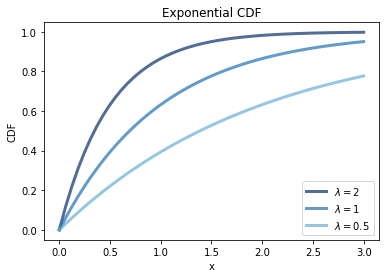

In [7]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r"$\lambda=%g$" % lam
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

Here's the distribution of interarrival times from a dataset of birth times.

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")

Downloaded nsfg.py
Downloaded analytic.py
Downloaded babyboom.dat


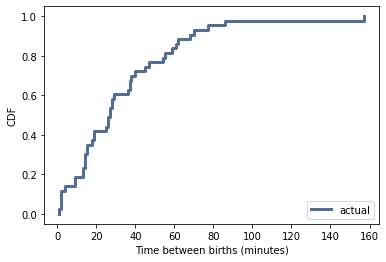

In [5]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

Here's what the CCDF looks like on a log-y scale.  A straight line is consistent with an exponential distribution.

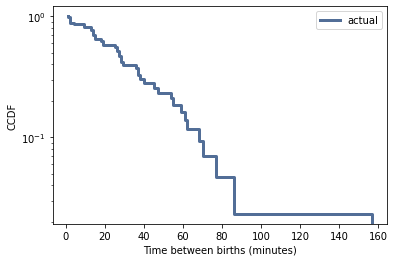

In [6]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Time between births (minutes)",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

## Normal distribution

Here's what the normal CDF looks like with a range of parameters.

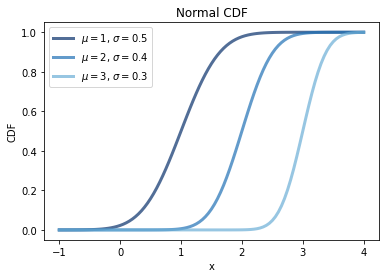

In [7]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

I'll use a normal model to fit the distribution of birth weights from the NSFG.

In [8]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [9]:
import nsfg
import first

In [10]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

Here's the observed CDF and the model.  The model fits the data well except in the left tail.

Mean, Var 7.280883100022579 1.5452125703544897
Sigma 1.2430657948614343


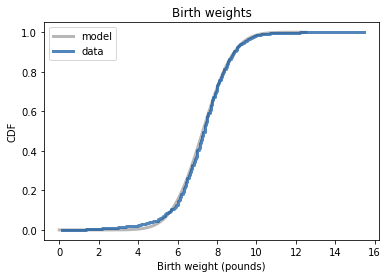

In [11]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(weights, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Birth weights", xlabel="Birth weight (pounds)", ylabel="CDF")

A normal probability plot is a visual test for normality.  The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

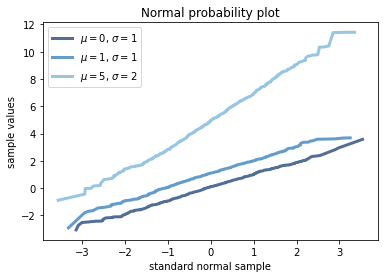

In [12]:
n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = "$\mu=%d$, $\sigma=%d$" % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(
    title="Normal probability plot",
    xlabel="standard normal sample",
    ylabel="sample values",
)

Here's the normal probability plot for birth weights, showing that the lightest babies are lighter than we expect from the normal mode, and the heaviest babies are heavier.

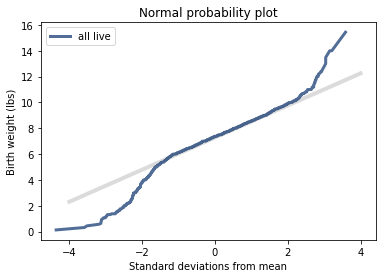

In [13]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

If we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births.

In [14]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.

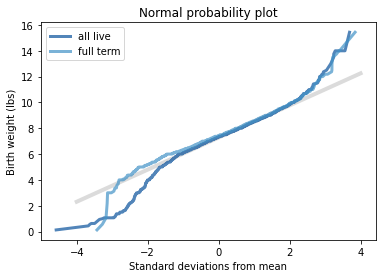

In [15]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label="full term")
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

## Lognormal model

As an example of a lognormal disrtribution, we'll look at adult weights from the BRFSS.

In [16]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

Downloaded brfss.py
Downloaded CDBRFS08.ASC.gz


In [1]:
import brfss

df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

The following function estimates the parameters of a normal distribution and plots the data and a normal model.

In [2]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label="weights")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

Here's the distribution of adult weights and a normal model, which is not a very good fit.

n, mean, std 398484 78.59599565702814 17.75455519179818


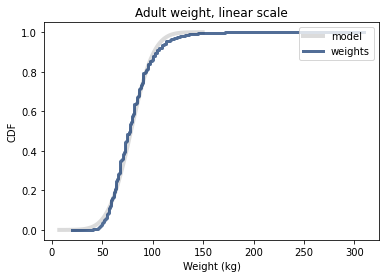

In [8]:
MakeNormalModel(weights)
thinkplot.Config(
    title="Adult weight, linear scale",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="upper right",
)

Here's the distribution of adult weight and a lognormal model, plotted on a log-x scale.  The model is a better fit for the data, although the heaviest people are heavier than the model expects.

n, mean, std 398484 1.884660713731975 0.09623580259151746


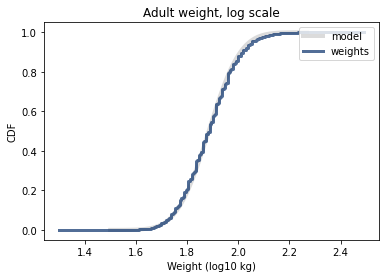

In [9]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(
    title="Adult weight, log scale",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper right",
)

The following function generates a normal probability plot.

In [10]:
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label="weights")

When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

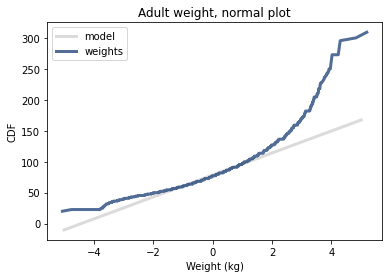

In [11]:
MakeNormalPlot(weights)
thinkplot.Config(
    title="Adult weight, normal plot",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="upper left",
)

If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

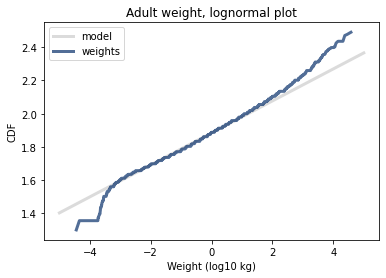

In [12]:
MakeNormalPlot(log_weights)
thinkplot.Config(
    title="Adult weight, lognormal plot",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper left",
)

## Pareto distribution

Here's what the Pareto CDF looks like with a range of parameters.

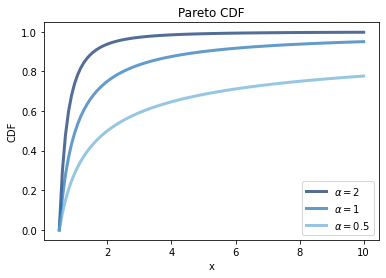

In [13]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

The distribution of populations for cities and towns is sometimes said to be Pareto-like.

In [14]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/populations.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/PEP_2012_PEPANNRES_with_ann.csv")

Downloaded populations.py
Downloaded PEP_2012_PEPANNRES_with_ann.csv


In [15]:
import populations

pops = populations.ReadData()
print("Number of cities/towns", len(pops))

Number of cities/towns 19515


Here's the distribution of population for cities and towns in the U.S., along with a Pareto model.  The model fits the data well in the tail.

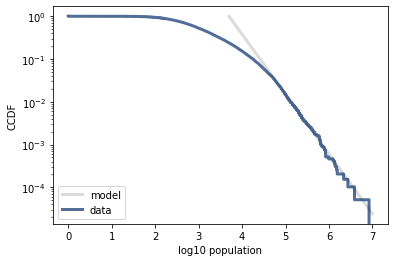

In [16]:
log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label="data")
cdf_log = thinkstats2.Cdf(log_pops, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 population", ylabel="CCDF", yscale="log", loc="lower left"
)

The lognormal model might be a better fit for this data (as is often the case for things that are supposed to be Pareto).

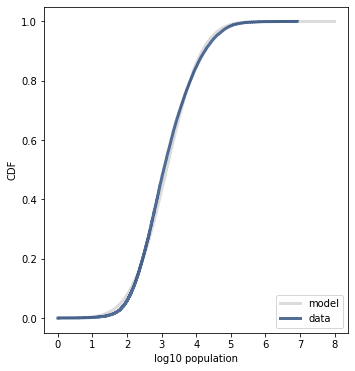

In [17]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 population", ylabel="CDF", loc="lower right")

Here's a normal probability plot for the log-populations.  The model fits the data well except in the right tail, where the biggest cities are bigger than expected.

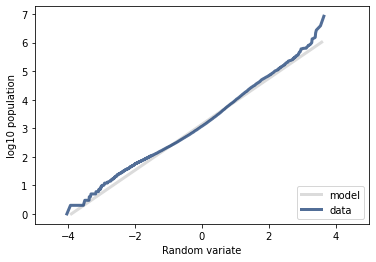

In [18]:
thinkstats2.NormalProbabilityPlot(log_pops, label="data")
thinkplot.Config(xlabel="Random variate", ylabel="log10 population", xlim=[-5, 5])

## Random variates

When we have an analytic CDF, we can sometimes invert it to generate random values.  The following function generates values from an exponential distribution.

In [19]:
import random


def expovariate(lam):
    p = random.random()
    x = -np.log(1 - p) / lam
    return x

We can test it by generating a sample.

In [20]:
t = [expovariate(lam=2) for _ in range(1000)]

And plotting the CCDF on a log-y scale.

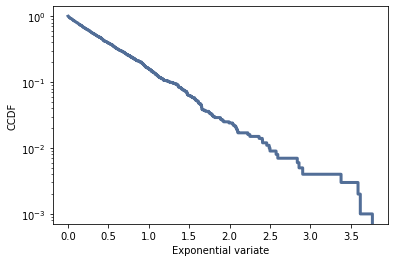

In [21]:
cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Exponential variate", ylabel="CCDF", yscale="log")

A straight line is consistent with an exponential distribution.

## Exercises

**Exercise:** Write a function that generates a Pareto variate. Generate a sample and plot its complementary CDF on a log-log scale. Does it look like a straight line?

In [22]:
# Create a function that generates a Pareto variate.

def generatePareto(alpha, scale, sampleSize):
    samples = np.random.random(sampleSize)

    # Use the formula to solve for the Pareto variate
    variate = scale * pow(1 - samples, -1 / alpha)
    return variate

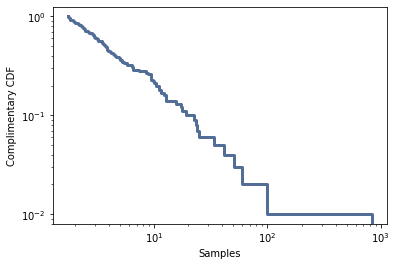

In [23]:
# Create a pareto variate and plot its CDF on a log scale.
paretoVariate = generatePareto(1, 1.7, 100)
cdf = thinkstats2.Cdf(paretoVariate)

# Plot the cdf
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Samples", ylabel="Complimentary CDF", xscale="log", yscale="log")

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [24]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [25]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [26]:
dist.mean(), dist.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are below the mean by more than one standard deviation?  About 16%

In [27]:
dist.cdf(mu - sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [31]:
# Determine heights in centimeters
# 5'10 = 177.8
# 6'1 = 185.42
low = dist.cdf(177.8)
high = dist.cdf(185.42)

mid = high - low

print(mid)


0.3427468376314737


**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [32]:
alpha = 1.7
xmin = 1  # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [33]:
# use the mean() function from the dist object.
dist.mean()

2.428571428571429

What fraction of people are shorter than the mean?

In [35]:
# Using the mean from the last section, we can take that as a cdf argument
# to find the percentage of people that are shorter than the mean.
dist.cdf(dist.mean())

0.778739697565288

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [38]:
# 1m = .001 km
# 7 billion (7,000,000,000)
taller = (1 - dist.cdf(1000)) * 7000000000
print(taller)

55602.976430479954


How tall do we expect the tallest person to be?

In [49]:
# Out of 7 billion people, how tall is the tallest?
tallest = (1 - dist.cdf(615000)) * 7000000000
print(tallest)

1.0092771063341388